# Project 2.1

## Importing the necessary libraries and modules

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score as ras 
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.linear_model import LogisticRegression as LR 
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import train_test_split as tts 

## Reading the Dataset 

In [3]:
data = pd.read_csv(r"C:\Users\acer\Desktop\train.csv")
pd.set_option('display.max_columns', None)
df = data.drop("id", axis = 1)  #Dropping the ID Column. 
df.head()

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,-0.338,0.416,-2.177,-0.326,0.340,1.174,-0.245,-1.070,-0.336,-0.502,0.403,-0.605,-0.280,-1.618,0.878,-0.272,0.870,2.171,-0.214,0.477,-2.092,0.835,0.621,-2.810,1.029,-0.736,0.582,-0.079,0.493,1.359,-0.177,0.406,-0.163,1.341,0.754,0.491,-1.560,-0.520,0.766,0.216,-0.510,0.101,-0.602,-0.721,-0.545,1.564,2.003,-1.940,1.285,-0.987,-1.370,1.373,-0.495,0.113,-0.523,0.053,-0.888,0.249,0.687,1.363,0.169,-1.122,1.209,0.891,0.866,0.847,-1.110,1.224,-1.302,-1.647,-0.091,0.255,0.730,-0.380,0.294,-0.725,0.844,1.002,-1.267,-0.043,1.158,0.779,-0.733,-0.501,1.841,1.459,0.847,1.926,-0.316,0.044,-0.294,0.120,-1.050,0.730,-1.001,-0.321,0.407,0.469,0.445,1.632,0.273,1.557,1.196,-0.548,-0.275,0.179,0.584,-1.873,0.928,0.720,0.885,0.044,-1.131,-1.576,0.616,1.957,-0.518,1.494,1.573,-0.484,0.590,-0.387,0.388,-1.032,-0.841,0.288,-0.230,-2.714,-0.473,0.476,-1.352,-0.922,0.329,-0.558,0.787,-1.043,-0.130,0.517,2.445,0.847,-0.636,-0.324,0.753,0.058,-1.461,-0.820,-0.076,1.127,-0.496,1.020,0.279,0.262,-0.277,-0.166,-0.089,-1.696,-0.598,-0.710,-0.431,0.355,0.966,-1.150,-0.156,0.393,-0.117,0.444,0.948,-0.608,-0.106,-0.491,-0.608,1.565,1.013,-1.391,0.807,-0.607,-0.856,1.230,0.124,-0.336,1.758,-1.649,-1.429,-1.322,-1.501,2.125,-0.572,1.178,-1.451,-0.374,2.386,1.883,0.758,0.295,1.261,-0.837,0.140,-0.183,0.756,0.616,1.371,0.820,-0.702,-1.266,0.496,-0.669,-0.325,-0.170,0.147,-1.134,0.077,1.271,-0.087,-1.431,1.640,0.694,0.949,-2.400,0.657,-0.431,0.124,-0.335,-2.820,0.573,-0.755,3.798,-0.001,0.998,-0.543,1.018,0.883,-1.037,0.513,0.694,0.856,-0.523,0.596,0.971,0.279,2.684,-0.057,-1.754,0.297,-2.196,0.798,-0.533,-0.661,0.564,-2.400,0.945,-0.971,0.055,1.107,-0.848,-1.781,0.254,-0.515,0.234,0.296,-1.774,2.032,-0.442,-0.116,1.393,-0.494,-0.179,1.874,1.463,-1.397,0.284,0.336,0.551,0.557,-0.522,-0.503,-0.541,1.393,0.506,-1.420,-0.123,-1.833,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,1.202,0.542,0.424,-1.572,-0.968,-1.483,0.564,0.047,-0.324,-1.490,0.179,-0.524,0.250,2.462,0.029,-1.399,-2.370,-1.505,-1.294,0.106,-0.145,0.235,-1.045,1.335,1.254,-0.811,1.812,0.181,-0.020,1.125,0.279,-0.682,1.161,1.194,0.243,1.179,1.338,-1.000,-0.362,-0.605,1.917,-1.157,0.394,-0.482,1.591,0.106,-0.959,0.600,-1.147,-1.064,3.080,1.057,0.947,-1.125,1.288,-0.171,1.124,-0.454,0.698,-0.028,2.208,0.014,0.872,2.286,-0.822,0.416,1.486,-0.331,-0.993,-0.071,0.543,-0.096,0.041,0.138,1.110,0.692,1.407,-0.234,-1.899,-0.131,0.934,0.802,-1.041,2.004,1.424,0.423,-0.352,-0.656,-0.053,1.036,-1.228,-0.854,-0.748,1.180,0.575,-1.472,-1.215,-0.889,0.004,-0.145,-0.933,-0.713,0.869,0.539,-0.911,-0.638,0.895,-1.896,-0.604,0.312,1.883,-0.292,-0.849,-0.453,0.894,0.339,2.095,0.336,1.290,0.057,-0.159,0.539,0.675,-1.015,-0.304,-1.301,-0.614,-1.176,0.117,0.075,-0.088,1.888,-0.119,0.434,0.135,1.779,0.554,-0.6

## Analyzng the Dataset

In [4]:
print("This dataset has only continuous values as the prevailing dataype is {}." .format(np.unique(df.dtypes)[0]))
print("This dataset has {} rows and {} columns. ".format(df.shape[0], df.shape[1]))
print("This dataset has {} missing values. ".format(df.isnull().sum().sum()))

This dataset has only continuous values as the prevailing dataype is float64.
This dataset has 250 rows and 301 columns. 
This dataset has 0 missing values. 


## Separating the Dependent and Independent Variables

In [5]:
x = df.drop("target", axis = 1)
y = df["target"]
x.shape,y.shape

((250, 300), (250,))

## Scaling the Data using MinMaxScaler

In [6]:
mms = MMS()
x_scaled = mms.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.382417,0.311863,0.421628,0.596574,0.748000,0.659405,0.432580,0.471463,0.438884,0.450980,0.541885,0.091829,0.394918,0.476173,0.771611,0.404466,0.346188,0.449156,0.421700,0.479761,0.364972,0.416236,0.181873,0.654145,0.403901,0.654782,0.918869,0.548416,0.638316,0.106436,0.606124,0.515555,0.052915,0.645633,0.291135,0.583302,0.504269,0.636608,0.800673,0.438430,0.609483,0.432731,0.746746,0.697796,0.510825,0.169213,0.419714,0.662525,0.518237,0.425947,0.436320,0.403650,0.317046,0.374336,0.768078,0.922779,0.186677,0.767280,0.328195,0.180026,0.758969,0.391562,0.486813,0.353253,0.516312,0.373452,0.589857,0.645817,0.796478,0.425197,0.426457,0.701606,0.734102,0.696730,0.714456,0.325726,0.798837,0.261689,0.213405,0.541640,0.545455,0.655371,0.390163,0.619553,0.358865,0.664440,0.682132,0.262336,0.488605,0.670872,0.603004,0.363581,0.482994,0.922965,0.834490,0.601887,0.853791,0.405714,0.506349,0.478717,0.479460,0.362619,0.659277,0.290893,0.432718,0.565072,0.578762,0.543505,0.727791,0.618478,0.868597,0.756566,0.468283,0.435093,0.629540,0.550242,0.119712,0.653182,0.595967,0.620534,0.500277,0.320631,0.206135,0.520182,0.792171,0.452015,0.843762,0.795947,0.324109,0.617132,0.422619,0.576115,0.258183,0.237540,0.500360,0.466655,0.000000,0.459961,0.682772,0.215864,0.303497,0.508640,0.407621,0.647663,0.393524,0.429208,0.633366,0.905942,0.523386,0.413909,0.428006,0.619055,0.429691,0.294087,0.345582,0.445734,0.654616,0.443680,0.560754,0.574867,0.558749,0.401383,0.488527,0.533266,0.205964,0.383142,0.422620,0.410788,0.589827,0.682047,0.281849,0.396715,0.505517,0.485775,0.543625,0.619153,0.367173,0.453123,0.469388,0.449896,0.778920,0.676343,0.277535,0.605589,0.375113,0.230453,0.821975,0.434630,0.395622,0.804775,0.155230,0.270379,0.263907,0.223280,0.883425,0.376873,0.778024,0.372718,0.410319,0.986943,0.857260,0.684172,0.530216,0.648679,0.308380,0.526661,0.421890,0.679519,0.659712,0.791805,0.633542,0.366523,0.253761,0.637804,0.312660,0.413708,0.528871,0.554168,0.303926,0.502148,0.785054,0.572899,0.207098,0.744636,0.683687,0.712553,0.086381,0.551882,0.382788,0.463572,0.387926,0.000000,0.618406,0.355156,1.000000,0.531835,0.685384,0.401289,0.734799,0.627201,0.475175,0.550931,0.705538,0.677794,0.352587,0.625987,0.651538,0.522671,0.989303,0.389203,0.171697,0.593579,0.112331,0.666123,0.428458,0.399844,0.579395,0.053773,0.674448,0.419960,0.501684,0.658881,0.385903,0.106143,0.489598,0.433480,0.613525,0.515809,0.099925,0.820559,0.434411,0.540841,0.596596,0.401425,0.471749,0.913742,0.770757,0.196796,0.561672,0.494017,0.599054,0.610452,0.388949,0.431632,0.390342,0.710323,0.578413,0.226512,0.449942,0.129685,0.543863,0.464034,0.566839,0.393416,0.557055,0.515525,0.613794,0.613695,0.691074,0.280484
1,0.425109,0.536009,0.839849,0.727770,0.870095,0.557533,0.843099,0.355556,0.669511,0.738562,0.560767,0.588393,0.180975,0.240072,0.223437,0.531687,0.545617,0.451568,0.263822,0.437978,0.378343,0.504584,1.00000

## Collecting Error Values to see the Trend 

In [7]:
i = 0
lr = LR()
test_error = []
train_error = []
while(i<10):
    x_train,x_test,y_train,y_test = tts(x, y)
    lr.fit(x_train, y_train)
# For Training Data:
    train_predict = lr.predict(x_train)
    train_roc_auc = ras(y_score = train_predict, y_true = y_train)
    train_error.append(1-train_roc_auc)

# For Test Data:
    test_predict = lr.predict(x_test)
    test_roc_auc = ras(y_score = test_predict, y_true = y_test)
    test_error.append(1-test_roc_auc)

    i = i+1

### Plotting Train and Test ROC AUC Errors

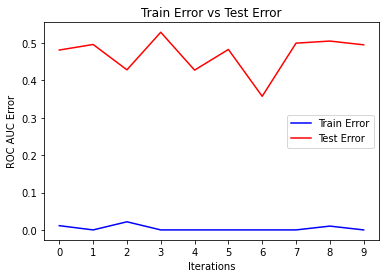

In [8]:
x_ticks = np.arange(0, 11, 1)
plt.xticks(x_ticks)
plt.plot(train_error , color = "blue", label = "Train Error")
plt.plot(test_error , color = "red", label = "Test Error")
plt.title("Train Error vs Test Error")
plt.xlabel("Iterations")
plt.ylabel("ROC AUC Error")
plt.legend()

From this graph, we can say that the Model is overfitted as the model performs extremely well on the training data but not on the validation data. 

## Parameter Tuning

### Removing the Columns that don't contribute much to the final prediction

In [9]:
lr.coef_

array([[ 2.64212594e-02, -4.94719267e-01, -1.12157070e-01,
         5.44875868e-01,  4.24735319e-01, -9.09333059e-02,
         4.64886711e-01, -2.11721691e-01,  3.23752099e-01,
        -5.69917853e-02,  3.66891893e-01,  2.14727974e-01,
        -1.60368876e-01, -7.59721229e-02,  2.78906930e-02,
        -4.20065697e-01, -1.11288592e+00, -5.89042292e-01,
         8.99120217e-01, -2.27817817e-01,  8.16660374e-02,
         2.46182467e-01, -1.56743194e-02,  6.09946098e-02,
        -3.56271433e-01,  6.36328903e-01,  1.89765811e-01,
        -3.62789130e-01,  3.06626836e-01, -1.62106774e-01,
        -4.14364354e-01, -4.54865096e-02,  5.05919754e-01,
        -7.33591879e-01,  3.07653690e-01, -4.76486379e-02,
         1.76844264e-01, -1.23612336e-02, -3.86687255e-01,
         3.74662451e-01, -2.33744464e-01, -2.33058554e-02,
         3.32161330e-01,  9.69596411e-02, -9.99287847e-02,
        -2.55375091e-01, -1.49973291e-01, -4.96716497e-02,
         7.77786206e-01, -9.54457088e-02,  2.25858981e-0

Text(0.5, 1.0, 'Coefficient plot')

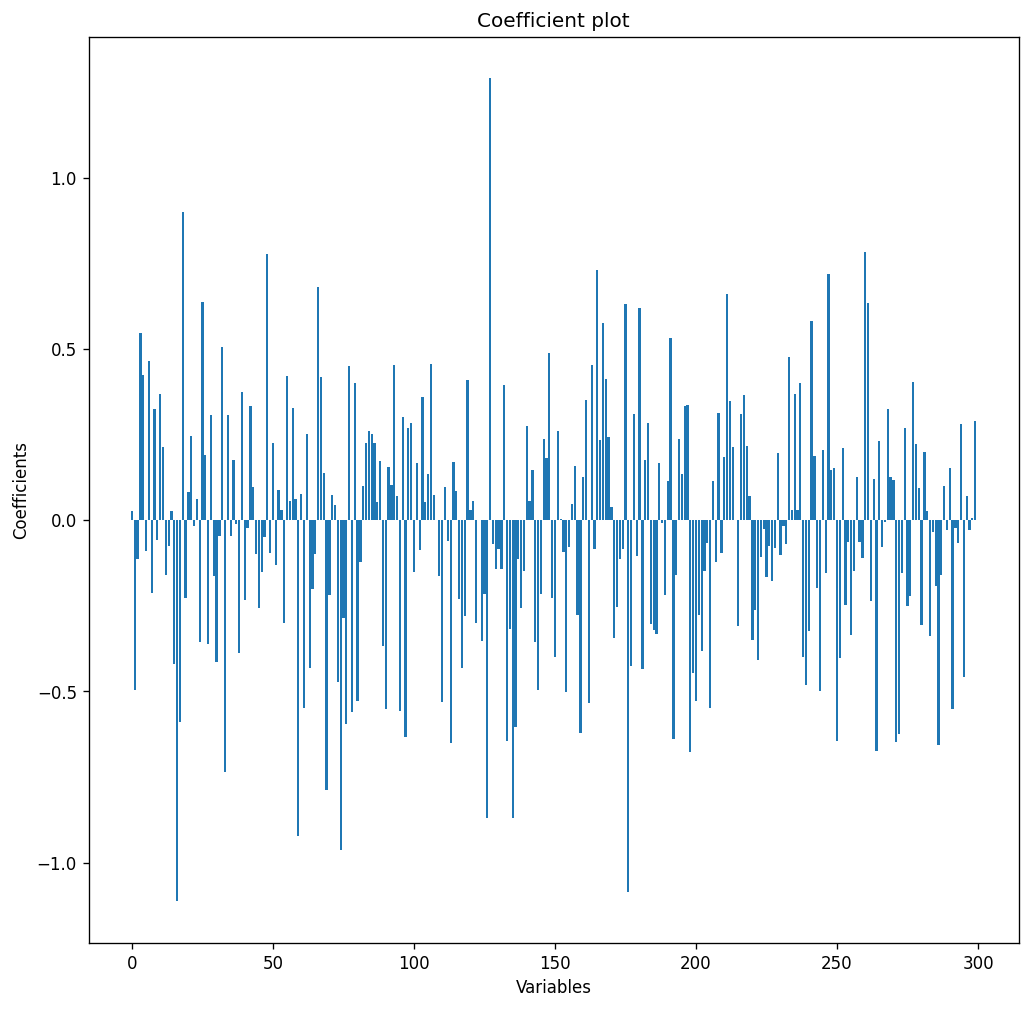

In [10]:
plt.figure(figsize=(10, 10), dpi=120, facecolor='w', edgecolor='b')
x = range(len(x_train.columns))
c = lr.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [11]:
Coefficients = pd.DataFrame({"Variables": x_train.columns, "Coefficients": lr.coef_.reshape(-1)})

Coefficients.head()

,Variables,Coefficients
0,0,0.026421
1,1,-0.494719
2,2,-0.112157
3,3,0.544876
4,4,0.424735


### Removing Columns with Coefficients less than 0.5

In [12]:
sign_value = Coefficients[Coefficients["Coefficients"]>0.4]

In [13]:
subsets = df[sign_value["Variables"]]

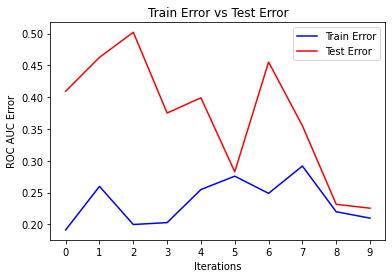

In [14]:
i = 0
lr = LR()
test_error = []
train_error = []
while(i<10):
    x_train,x_test,y_train,y_test = tts(subsets, y)
    lr.fit(x_train, y_train)
# For Training Data:
    train_predict = lr.predict(x_train)
    train_roc_auc = ras(y_score = train_predict, y_true = y_train)
    train_error.append(1-train_roc_auc)

# For Test Data:
    test_predict = lr.predict(x_test)
    test_roc_auc = ras(y_score = test_predict, y_true = y_test)
    test_error.append(1-test_roc_auc)

    i = i+1

x_ticks = np.arange(0, 11, 1)
plt.xticks(x_ticks)
plt.plot(train_error , color = "blue", label = "Train Error")
plt.plot(test_error , color = "red", label = "Test Error")
plt.title("Train Error vs Test Error")
plt.xlabel("Iterations")
plt.ylabel("ROC AUC Error")
plt.legend()

In [15]:
x_train,x_test,y_train,y_test = tts(subsets, y, random_state = 56)
lr = LR()

#For Training Data:

lr.fit(x_train, y_train)
train_predict = lr.predict(x_train)
train_ras = ras(train_predict, y_train)

#For Test Data:


test_predict = lr.predict(x_test)
test_ras = ras(test_predict, y_test)

train_ras, test_ras

(0.7966338259441708, 0.7963286713286714)

Text(0.5, 1.0, 'Coefficient plot')

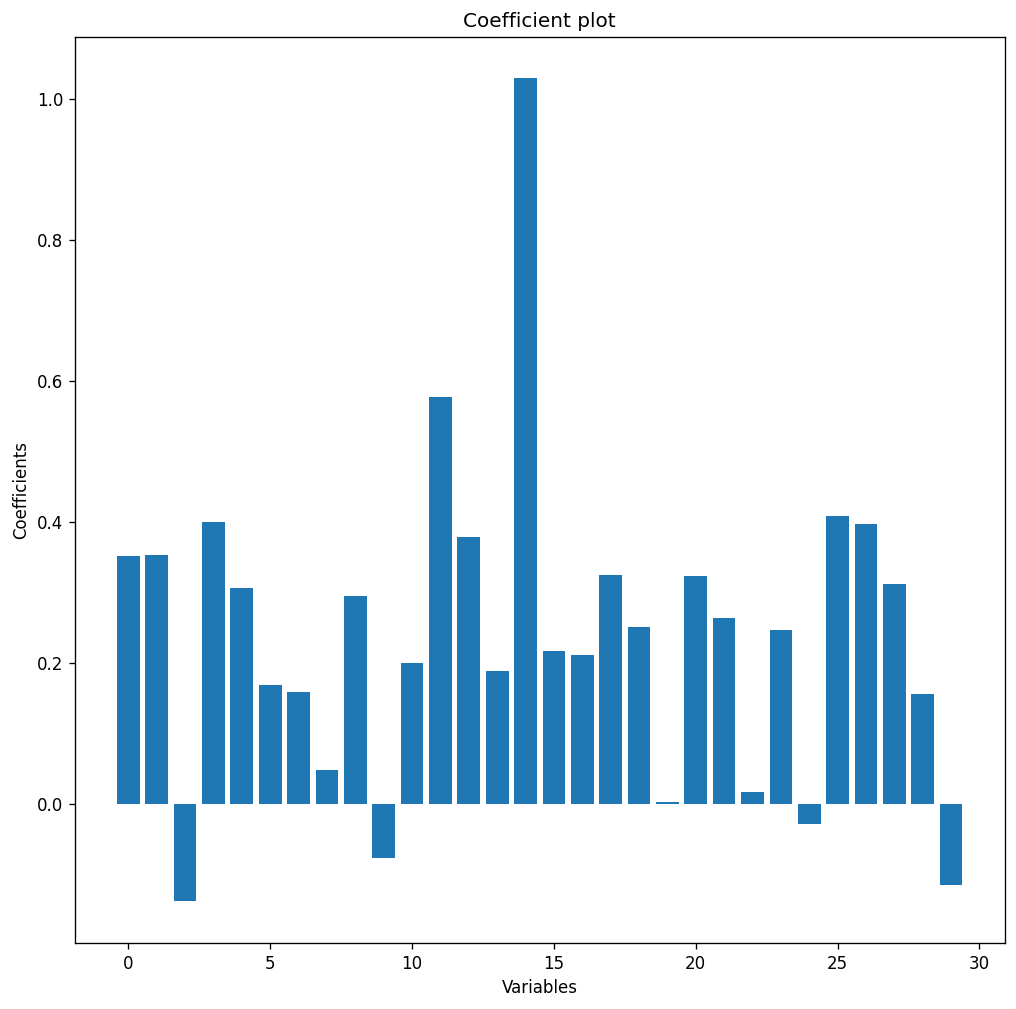

In [16]:
plt.figure(figsize=(10, 10), dpi=120, facecolor='w', edgecolor='b')
x = range(len(x_train.columns))
c = lr.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

## Confusion Matrix

<AxesSubplot:>

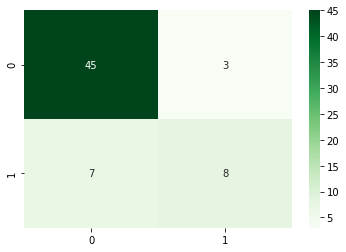

In [17]:
cf_matrix = confusion_matrix(y_true = y_test, y_pred = test_predict)
cf_matrix
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Greens')

In [18]:
lr.coef_

array([[ 0.35162035,  0.35286615, -0.13806412,  0.40086736,  0.3061354 ,
         0.16872267,  0.15878011,  0.04822525,  0.2948038 , -0.0760976 ,
         0.20049042,  0.57797971,  0.37895567,  0.18949043,  1.03012779,
         0.21747633,  0.21107035,  0.32542645,  0.25109635,  0.00346987,
         0.32332942,  0.26355628,  0.01721967,  0.24726035, -0.02775774,
         0.40878377,  0.39711106,  0.31214014,  0.15573007, -0.11480215]])

## Cross Validation

In [19]:
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(subsets,y):
    x_train, x_test, y_train, y_test = subsets.iloc[train_index], subsets.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    lr.fit(x_train, y_train)
    test_predict = lr.predict(x_test)
    test_roc_auc = ras(y_score = test_predict, y_true = y_test)

In [20]:
cvs(lr, subsets, y, scoring="roc_auc", cv=10)

array([0.75396825, 0.68253968, 0.72222222, 0.8968254 , 0.86507937,
       0.70634921, 0.76984127, 0.80701754, 0.79824561, 0.55263158])

<AxesSubplot:>

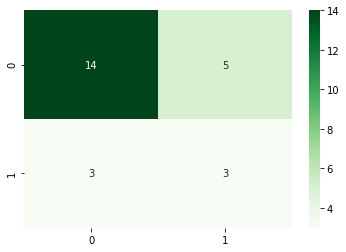

In [21]:
lr.coef_
cf_matrix = confusion_matrix(y_true = y_test, y_pred = test_predict)
cf_matrix
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Greens')

## Predicting the Values of the Test Data, Dataset the model hasn't seen yet

In [22]:
test = pd.read_csv(r"C:\Users\acer\Desktop\test.csv")

In [23]:
test.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,250,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,-1.380,0.001,-1.340,-0.371,-0.735,-0.545,-0.525,-1.139,1.263,-0.240,0.931,-1.151,0.938,0.720,-1.543,-1.467,0.402,0.538,0.614,-0.318,-1.417,0.471,-1.139,2.294,-0.577,-0.190,-1.252,-1.708,0.415,-1.450,2.212,0.669,2.079,-1.006,-0.867,1.165,1.110,-0.419,-0.807,0.464,1.571,0.039,0.043,-0.612,0.185,0.517,0.729,-2.804,-0.554,1.769,-1.160,0.955,-0.231,-0.516,0.801,-0.525,-0.059,0.325,-0.573,0.435,-0.070,0.784,0.225,-0.208,-0.351,0.974,-1.421,-1.123,0.515,0.513,-0.448,0.275,0.467,-0.059,0.009,0.861,-0.686,2.235,-1.073,-0.274,-0.100,0.227,0.611,-1.071,0.243,0.190,0.145,-0.570,-0.087,0.970,-0.361,-0.181,0.541,-0.788,-2.268,-0.658,-0.311,0.368,-1.165,1.190,0.199,-0.221,-0.383,1.673,-0.464,0.110,-0.430,0.421,0.312,-1.152,-0.813,-0.616,-0.027,-0.965,-0.507,0.877,1.684,-0.991,0.876,-0.047,-2.067,-0.437,-0.669,0.108,-0.272,1.407,-0.818,0.598,-0.937,0.334,-0.716,0.422,1.704,0.127,0.011,0.286,0.409,-1.016,-0.048,-0.260,-0.400,1.283,1.241,-0.089,0.063,0.649,-0.487,-0.991,-1.020,0.131,0.846,-0.408,0.825,-0.467,0.574,-0.278,0.102,0.246,0.744,-0.372,-0.327,1.845,0.740,-1.020,0.348,1.971,0.082,-0.229,-1.568,-0.607,0.041,-0.651,-0.520,1.745,0.104,0.593,-1.698,-0.683,1.136,1.567,1.478,-0.337,1.293,2.484,0.797,-0.368,-1.978,1.218,0.264,0.348,-1.129,-2.029,-0.304,-1.632,1.238,-1.154,1.640,-0.201,-0.618,1.022,2.440,-0.477,1.804,-0.136,-1.015,-0.145,-2.786,0.166,0.513,0.894,-0.109,-0.033,-2.857,-0.820,0.444,-0.574,-0.329,0.287,0.258,-0.801,0.827,0.688,-0.478,0.657,1.837,0.837,-0.585,0.636,0.733,-1.180,-1.796,0.044,-0.965,0.273,0.077,-0.097,-1.518,0.514,-0.439,-0.292,-0.207,1.309,-1.055,0.987,0.979,-0.805,2.190,0.451,0.200,-1.133,0.029,0.188,-0.756,-0.542,-0.231,0.306,-0.680,0.727,1.372,0.794,-0.930,0.652,-0.398,-0.236,1.621,0.089,-0.282,0.170,0.514,-0.321,1.038,-0.336,-1.170,0.245,-0.032,0.227,1.757,-1.513,-1.058,-0.559,0.664,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,251,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,0.584,2.620,1.373,0.257,0.322,-0.009,1.844,0.576,0.686,0.095,-0.906,-0.773,-0.781,-0.659,-1.284,-0.922,-0.097,-0.464,-0.277,-0.320,0.330,-0.780,1.050,2.206,-0.587,1.220,1.350,-0.779,-0.160,0.119,-0.029,-0.089,-0.219,-0.678,-1.141,-0.767,-1.287,0.085,0.290,0.222,2.432,-0.965,0.936,2.664,-1.480,1.851,-0.152,-0.378,0.643,-0.346,0.255,0.182,0.233,-0.271,-1.051,0.678,0.511,-2.332,-0.790,-0.253,-1.634,-2.158,-0.294,2.047,0.576,1.016,0.188,-0.431,-2.345,1.040,0.483,1.121,-0.950,1.239,-0.174,1.087,1.272,-1.891,0.947,0.318,-2.126,-0.395,0.151,1.001,-0.107,1.431,1.247,1.235,-0.470,0.871,0.523,0.260,0.855,0.132,1.574,1.343,1.578,1.584,-0.193,1.404,-0.900,-1.515,0.189,-0.232,1.472,1.251,2.355,-0.430,0.061,0.382,1.250,1.676,0.445,-2.140,0.664,0.560,0.180,0.419,0.065,-0.299,0.068,1.281,-0.365,-0.047,-2.473,0.699,-0.421,-1.526,-0.202,-0.613,0.138,-0.988,0.696,-0.194,-0.191,0.282,-1.424

In [24]:
test_df = test[sign_value["Variables"]]
test_df.head()

,3,4,6,18,25,32,48,55,66,67,77,93,106,119,127,148,163,165,167,168,175,180,191,211,233,241,247,260,261,277
0,-0.838,0.149,0.242,-0.240,0.402,2.294,0.464,0.729,0.325,-0.573,0.515,0.243,0.368,-0.813,0.876,-0.260,0.574,0.102,0.744,-0.372,0.082,-0.651,1.293,1.804,1.837,-0.965,-0.439,0.188,-0.756,0.514
1,0.054,1.149,0.836,0.095,-0.097,2.206,0.222,-0.152,-2.332,-0.790,-2.345,-0.107,1.584,1.250,0.065,-0.164,0.247,-0.106,1.609,0.039,0.760,-0.920,-0.631,-0.174,0.791,0.474,0.761,0.513,1.831,0.158
2,1.518,0.265,0.245,-1.010,-0.589,0.690,-1.216,2.045,-0.040,-0.017,1.777,-0.376,0.532,-1.216,0.483,1.001,-0.715,-1.454,-0.499,1.445,-1.291,-0.221,0.488,-0.975,0.823,0.536,1.215,0.174,-0.042,0.221
3,0.570,-1.540,0.462,2.246,0.049,-0.289,0.018,0.960,-0.044,-0.714,-0.743,0.839,-0.399,-0.847,-0.354,-0.657,-1.327,-0.259,-0.029,-0.269,0.815,-1.019,0.563,-0.892,1.617,1.263,0.008,0.554,1.532,-1.023
4,0.853,-0.384,0.514,1.628,-0.665,0.529,-0.276,1.263,1.439,1.044,0.587,1.441,-0.517,0.362,-0.328,-1.388,0.788,-0.444,-0.374,-0.818,0.330,0.588,0.753,0.285,-0.073,0.941,-1.871,0.017,-0.860,-0.068


In [25]:
main_test_pred = lr.predict(test_df)

In [26]:
test["target"] = main_test_pred

## Creating and Saving the Final Dataset

In [27]:
final = test[["id", "target"]]

In [28]:
final.to_csv(r"C:\Users\acer\Desktop\final.csv", index = False)